Aim: 
1) Create a labelled dataset of Celebrity Images of around 30 Celebirties.
2) Train a ML Model that is able to classify an unseen image with reasonable accuracy.

Steps:
1) Data Collection
2) Data PreProcessing
3) Feature Extratcion
4) Model Building

# Data Collection


For Collecting Dataset, I have used Chrome browser extensions fatkun, which can downnload images in Bulk.
Data is collected in the form of images for different celebrities.

# Data Preprocessing

It was observed that many unimportant images were colected. These types of images will lead to consumption of more resources of the system, through which classifier might make mistakes. So, those images should are not used.

In this project, OpenCV technique called haarcascades are used for Data Cleaning purposes. They will detect if a face and two eyes are clearly visible or not. If they are visible then the image is kept otherwise the image is discarded. Majority of the data cleaning work will be done using python code but there will be some cleaning work that will have to be done manually. Manual checking of images is required to remove the unwanted faces. 

In [1]:
import numpy as np
import pandas as pd
import cv2 
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('./dataset/Alia_Bhatt/151.jpg')  #Reading a Sample Image
print(img.shape)  #(x,y,RGB Values)

(422, 759, 3)


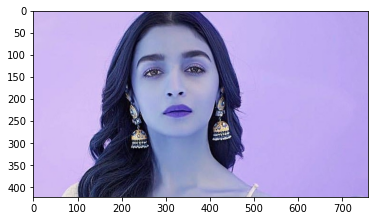

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #Converting Image to gray.
gray.shape #The 3rd dimesnsion i.e. RGB values is removed in gray images.

(422, 759)

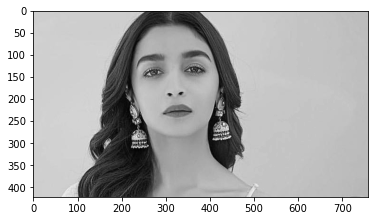

In [5]:
plt.imshow(gray, cmap='gray')

In [6]:
#The code is taken from OpenCv documentation to detect face from an image
#XML files are downloaded and saved in our project directory.

face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces #It returns array of face which has x,y,width and height.

array([[191,  32, 266, 266]], dtype=int32)

In [7]:
(x,y,w,h) = faces[0]  #Storing face value for !st face to crop it later on.
x,y,w,h

(191, 32, 266, 266)

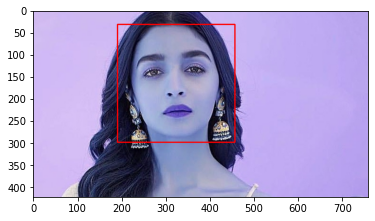

In [8]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  #Drawing a rectangle over a face.
plt.imshow(face_img)

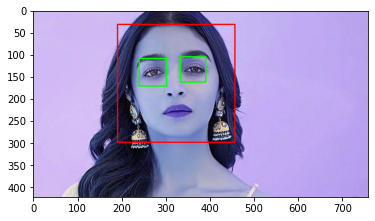

In [9]:
#Opencv Method to detect eyes over a face.

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()
cv2.destroyAllWindows()

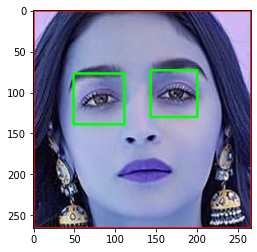

In [10]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [11]:
cropped_img = np.array(roi_color)
cropped_img

array([[[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [205, 183, 242],
        ...,
        [203, 185, 246],
        [203, 185, 246],
        [255,   0,   0]],

       ...,

       [[255,   0,   0],
        [255,   0,   0],
        [ 29,  32,  60],
        ...,
        [ 49,  54,  99],
        [ 18,  22,  70],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [ 48,  51,  79],
        ...,
        [ 53,  56, 100],
        [ 32,  35,  80],
        [255,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        ...,
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]]

In [12]:
cropped_img.shape


(266, 266, 3)

In [13]:
#Now we write a function to get cropped images of all the images in dataset
#The fucntion will work for images where face is clearly visible.
#for images where face is not visible funtion will return None and would help us in Data Cleaning.

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    #print(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 1:
            return roi_color

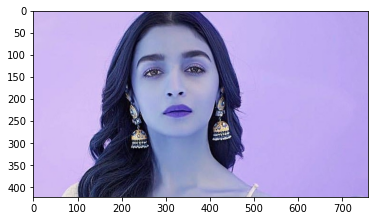

In [14]:
original_image = cv2.imread('./dataset/Alia_Bhatt/151.jpg')
plt.imshow(original_image)

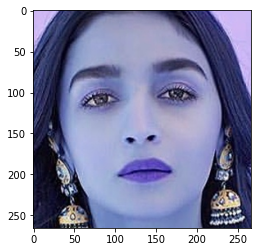

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./dataset/Alia_Bhatt/151.jpg')
plt.imshow(cropped_image)

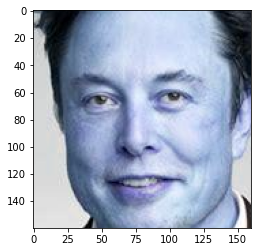

In [16]:
cropped_image2 = get_cropped_image_if_2_eyes('./dataset/Elon_Musk/Musk1.jpg')
plt.imshow(cropped_image2)

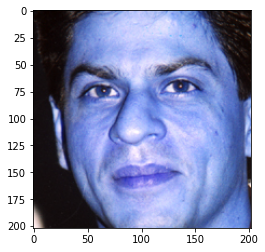

In [17]:
cropped_image3 = get_cropped_image_if_2_eyes('./dataset/Shah_Rukh_Khan/21.jpg')
plt.imshow(cropped_image3)

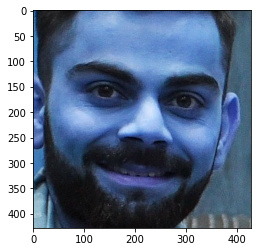

In [21]:
cropped_image3 = get_cropped_image_if_2_eyes('./dataset/Virat_Kohli/34.jpg')
plt.imshow(cropped_image3)

In [22]:
import os
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped_images/"


In [23]:
#Now we will store the names of directories in a variable.
img_directories = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_directories.append(entry.path)

In [24]:
img_directories

['./dataset/Aishwarya_Rai',
 './dataset/Alia_Bhatt',
 './dataset/Amitabh_Bachchan',
 './dataset/Bill_Gates',
 './dataset/Donald_Trump',
 './dataset/Elon_Musk',
 './dataset/Jack_Ma',
 './dataset/Narendra_Modi',
 './dataset/Shah_Rukh_Khan',
 './dataset/Virat_Kohli']

In [25]:
import shutil  #To generate a cropped folder if it donot exists
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [26]:
#Function to generate cropped images and save them in a folder cropped_images.

cropped_image_dirs = []
celebrity_file_names_dict = {}


for img_dir in img_directories:
    count = 1
    celebrity_name = img_dir.split('/')[-1]   #Extracting Celebrity name from directory
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)  #To get cropped face
        if roi_color is not None:        #To check if face and 2 eyes are clearly visible
            cropped_folder = path_to_cr_data + celebrity_name   #Making Individual SubFolders
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)       #Creating folder if it doesn't exist
                cropped_image_dirs.append(cropped_folder)   
                print("Generating cropped images in folder: ",cropped_folder)
            
            cropped_file_name = celebrity_name + str(count) + ".png"   #Renaming cropped images for simplicity
            cropped_file_path = cropped_folder + "/" + cropped_file_name
        
            cv2.imwrite(cropped_file_path, roi_color)     #Saving as an image in the path
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)  #Saving image file path in a dictionary
            count += 1
    


Aishwarya_Rai
Generating cropped images in folder:  ./dataset/cropped_images/Aishwarya_Rai
Alia_Bhatt
Generating cropped images in folder:  ./dataset/cropped_images/Alia_Bhatt
Amitabh_Bachchan
Generating cropped images in folder:  ./dataset/cropped_images/Amitabh_Bachchan
Bill_Gates
Generating cropped images in folder:  ./dataset/cropped_images/Bill_Gates
Donald_Trump
Generating cropped images in folder:  ./dataset/cropped_images/Donald_Trump
Elon_Musk
Generating cropped images in folder:  ./dataset/cropped_images/Elon_Musk
Jack_Ma
Generating cropped images in folder:  ./dataset/cropped_images/Jack_Ma
Narendra_Modi
Generating cropped images in folder:  ./dataset/cropped_images/Narendra_Modi
Shah_Rukh_Khan
Generating cropped images in folder:  ./dataset/cropped_images/Shah_Rukh_Khan
Virat_Kohli
Generating cropped images in folder:  ./dataset/cropped_images/Virat_Kohli


In [27]:
img_directories

['./dataset/Aishwarya_Rai',
 './dataset/Alia_Bhatt',
 './dataset/Amitabh_Bachchan',
 './dataset/Bill_Gates',
 './dataset/Donald_Trump',
 './dataset/Elon_Musk',
 './dataset/Jack_Ma',
 './dataset/Narendra_Modi',
 './dataset/Shah_Rukh_Khan',
 './dataset/Virat_Kohli']

In [28]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Aishwarya_Rai': ['./dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai1.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai10.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai100.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai101.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai102.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai103.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai104.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai105.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai106.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai107.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai108.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai109.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai11.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai110.png',
  './dataset/cropped_images/Aishwarya_Rai\\Aishwarya_Rai111.png

In [29]:
#Assigning a number (or Key) to each of the Celebrity.
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Aishwarya_Rai': 0,
 'Alia_Bhatt': 1,
 'Amitabh_Bachchan': 2,
 'Bill_Gates': 3,
 'Donald_Trump': 4,
 'Elon_Musk': 5,
 'Jack_Ma': 6,
 'Narendra_Modi': 7,
 'Shah_Rukh_Khan': 8,
 'Virat_Kohli': 9}

In [30]:
#The Wavelet Transformation code is taken from Stackoverflow

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    #compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

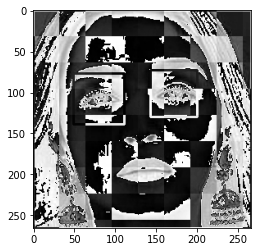

In [31]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [32]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))   #Resizing images for uniformity.
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        #Vertically stacking images to extract features from both the wavelet transformed image and colored image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [33]:
len(X[0])

4096

In [34]:
X[0]

array([[ 29],
       [ 23],
       [ 24],
       ...,
       [243],
       [137],
       [ 21]], dtype=uint8)

In [35]:
y[0]

0

In [36]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(888, 4096)

In [37]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)


0.7972972972972973

In [43]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        45
           1       0.78      0.67      0.72        42
           2       0.94      0.68      0.79        22
           3       0.67      0.67      0.67         6
           4       1.00      0.88      0.93         8
           5       0.97      0.85      0.91        34
           6       0.82      0.93      0.87        30
           7       0.83      0.83      0.83         6
           8       0.71      0.85      0.77        20
           9       1.00      0.78      0.88         9

    accuracy                           0.80       222
   macro avg       0.84      0.80      0.81       222
weighted avg       0.81      0.80      0.80       222



In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [46]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    print("Calculating")
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Calculating
Calculating
Calculating


,model,best_score,best_params
0,svm,0.815385,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.515049,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.770306,{'logisticregression__C': 1}


In [47]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [48]:
best_estimators['svm'].score(X_test,y_test)

0.8018018018018018

In [49]:
best_estimators['random_forest'].score(X_test,y_test)

0.5900900900900901

In [50]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7882882882882883

In [51]:
best_clf = best_estimators['svm']

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[34,  9,  0,  0,  0,  0,  2,  0,  0,  0],
       [10, 31,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  1, 14,  1,  0,  0,  0,  0,  5,  0],
       [ 1,  0,  0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  7,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0, 31,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0, 28,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  5,  0,  0],
       [ 1,  1,  2,  0,  0,  0,  0,  0, 16,  0],
       [ 1,  0,  0,  0,  0,  0,  1,  0,  0,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

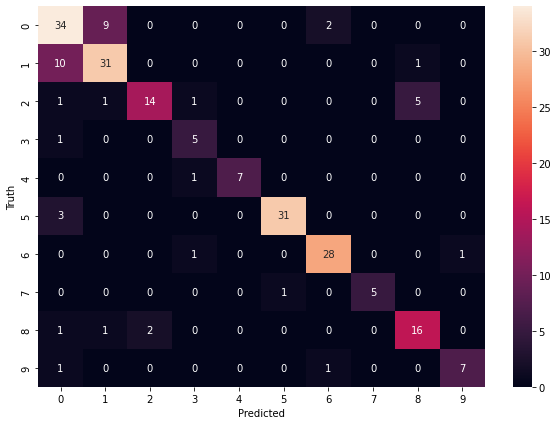

In [53]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
!pip install joblib
import joblib 
joblib.dump(best_clf, 'saved_model.pkl')   #Saving the model in a pickle file. 

['saved_model.pkl']